In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from skimage import io
import os

low_train = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/ClassifierData/training/low_training'
high_train = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/ClassifierData/training/high_training'
low_val = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/ClassifierData/validation/low_validation'
high_val = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/ClassifierData/validation/high_validation'
high_val_2 = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/ClassifierData/testing/high_testing'
high_val_3 = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/ClassifierData/testing/low_testing'

# low_train = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/Filtered/jasp_cells_norm'
# high_train = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/Filtered/latb_cells_norm'
# low_val = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/Filtered/serum_cells_norm'
# high_val = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/Filtered/vc_cells_norm'
# high_val_2 = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/Filtered/sfm_cells_norm'



print('lo training Num: ' + str(len(os.listdir(os.path.join(low_train)))))
print('hi training Num: ' + str(len(os.listdir(os.path.join(high_train)))))
print('lo validation Num: ' + str(len(os.listdir(os.path.join(low_val)))))
print('hi validation Num: ' + str(len(os.listdir(os.path.join(high_val)))))
print('lo test Num: ' + str(len(os.listdir(os.path.join(high_val_3)))))
print('hi test Num: ' + str(len(os.listdir(os.path.join(high_val_2)))))


lo training Num: 2225
hi training Num: 1569
lo validation Num: 636
hi validation Num: 449
lo test Num: 318
hi test Num: 223


In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
#ALL DEPENDENCIES 
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np




In [ ]:
train_dir = "/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/Filtered/filtered_tables/classifier2_data/training"
validation_dir = "/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/Filtered/filtered_tables/classifier2_data/validation"

In [ ]:
# # high_test_count = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/Filtered/filtered_tables/classifier_data/testing/high_testing'
# # low_test_count = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/Filtered/filtered_tables/classifier_data/testing/low_testing'
# high_training_count = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/Filtered/filtered_tables/classifier_data/training/high_training'
# low_training_count = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/Filtered/filtered_tables/classifier_data/training/low_training'
# high_validation_count = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/Filtered/filtered_tables/classifier_data/validation/high_validation'
# low_validation_count = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/Filtered/filtered_tables/classifier_data/validation/low_validation'


# # print('High Testing Num: ' + str(len(os.listdir(os.path.join(high_test_count)))))
# print('High Train Num: ' + str(len(os.listdir(os.path.join(high_training_count)))))
# print('High Val Num: ' + str(len(os.listdir(os.path.join(high_validation_count)))))
# # print('Low Testing Num: ' + str(len(os.listdir(os.path.join(low_test_count)))))
# print('Low Train Num: ' + str(len(os.listdir(os.path.join(low_training_count)))))
# print('Low Val Num: ' + str(len(os.listdir(os.path.join(low_validation_count)))))



High Train Num: 1873
High Val Num: 468
Low Train Num: 1567
Low Val Num: 392


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function = tf.keras.applications.vgg16.preprocess_input)
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function = tf.keras.applications.vgg16.preprocess_input)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=50,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=30,
        class_mode='binary',
        shuffle = False) 

Found 1440 images belonging to 2 classes.
Found 411 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (50, 150, 150, 3)
labels batch shape: (50,)


In [ ]:
#Be sure to set batch size equal or near (num of images) / epochs

history = model.fit(
      train_generator,
      steps_per_epoch=28,  
      epochs=14,
      validation_data=validation_generator,
      validation_steps=13)

Epoch 1/14
28/28 [==============================] - 420s 15s/step - loss: 0.6502 - acc: 0.6565 - val_loss: 0.6251 - val_acc: 0.6974
Epoch 2/14
28/28 [==============================] - 4s 158ms/step - loss: 0.6105 - acc: 0.6839 - val_loss: 0.5869 - val_acc: 0.7487
Epoch 3/14
28/28 [==============================] - 4s 159ms/step - loss: 0.5767 - acc: 0.7327 - val_loss: 0.5752 - val_acc: 0.7026
Epoch 4/14
28/28 [==============================] - 4s 160ms/step - loss: 0.4887 - acc: 0.7809 - val_loss: 0.4784 - val_acc: 0.7590
Epoch 5/14
28/28 [==============================] - 4s 159ms/step - loss: 0.4820 - acc: 0.7901 - val_loss: 0.4783 - val_acc: 0.7718
Epoch 6/14
28/28 [==============================] - 4s 157ms/step - loss: 0.4574 - acc: 0.7869 - val_loss: 0.5779 - val_acc: 0.7256
Epoch 7/14
28/28 [==============================] - 4s 160ms/step - loss: 0.4379 - acc: 0.8018 - val_loss: 0.5874 - val_acc: 0.7077
Epoch 8/14
28/28 [==============================] - 5s 164ms/step - loss: 0.

In [ ]:
model.save('results_1.h5')

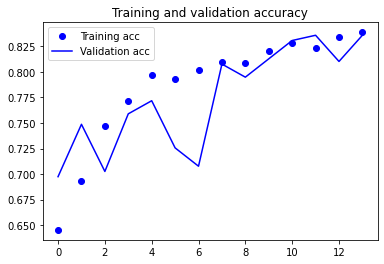

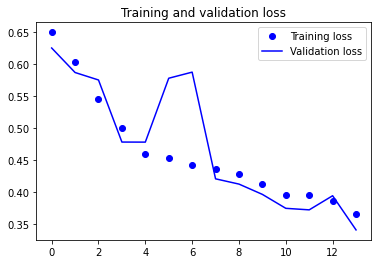

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_true,y_pred)

auc = auc(fpr, tpr)

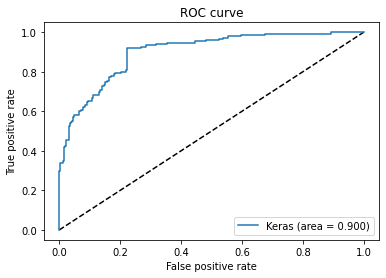

In [ ]:
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


num_of_val_samples = 1085
batch_size = 20

Y_pred = model.predict(validation_generator, num_of_val_samples //batch_size + 1)
y_pred = np.argmax(Y_pred, axis = 1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['low_validation', 'high_validation']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[261   0]
 [150   0]]
Classification Report
                 precision    recall  f1-score   support

 low_validation       0.64      1.00      0.78       261
high_validation       0.00      0.00      0.00       150

       accuracy                           0.64       411
      macro avg       0.32      0.50      0.39       411
   weighted avg       0.40      0.64      0.49       411



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


With Data Augmentation


In [ ]:
datagen = ImageDataGenerator(
      rotation_range=50,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0,
      horizontal_flip=True,
      fill_mode='nearest')

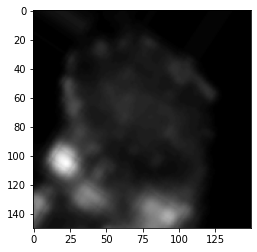

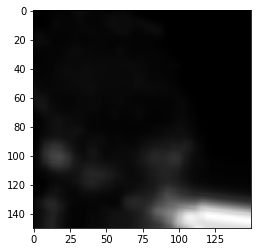

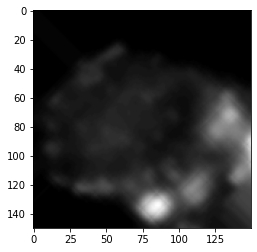

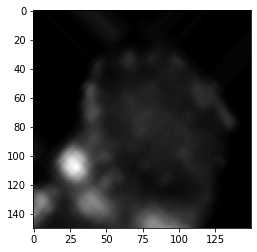

In [ ]:
import os

train_gactin_dir = "/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/Filtered/filtered_tables/classifier_data/training/low_training"
train_jasactin_dir = "/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/Filtered/filtered_tables/classifier_data/high_training"

# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_gactin_dir, fname) for fname in os.listdir(train_gactin_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# model.compile(optimizer='sgd',
#               loss='mse',
#               metrics=[tf.keras.metrics.TruePositives()])

# model.compile(optimizer='sgd', loss='mse', metrics=[tf.keras.metrics.AUC()])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary',
        shuffle = False)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=35,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=68,
      epochs=12,
      validation_data=validation_generator,
      validation_steps=24)

Found 3440 images belonging to 2 classes.
Found 860 images belonging to 2 classes.
Epoch 1/12
68/68 [==============================] - 25s 362ms/step - loss: 0.7013 - acc: 0.4414 - val_loss: 0.6729 - val_acc: 0.5464
Epoch 2/12
68/68 [==============================] - 24s 354ms/step - loss: 0.6978 - acc: 0.5270 - val_loss: 0.6639 - val_acc: 0.5452
Epoch 3/12
68/68 [==============================] - 24s 356ms/step - loss: 0.6792 - acc: 0.5919 - val_loss: 0.6134 - val_acc: 0.7369
Epoch 4/12
68/68 [==============================] - 24s 355ms/step - loss: 0.6710 - acc: 0.5849 - val_loss: 0.6115 - val_acc: 0.6917
Epoch 5/12
68/68 [==============================] - 24s 354ms/step - loss: 0.6560 - acc: 0.6315 - val_loss: 0.5565 - val_acc: 0.7012
Epoch 6/12
68/68 [==============================] - 24s 356ms/step - loss: 0.6702 - acc: 0.6372 - val_loss: 0.5299 - val_acc: 0.7738
Epoch 7/12
68/68 [==============================] - 24s 353ms/step - loss: 0.6365 - acc: 0.6654 - val_loss: 0.5210 - va

In [ ]:
model.save('result_2.h5')

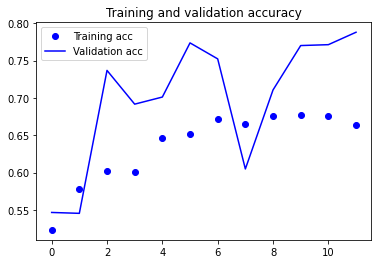

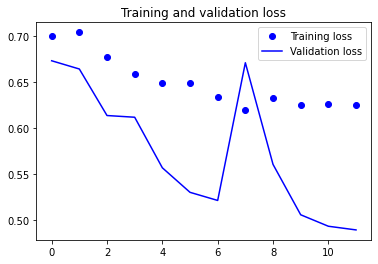

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix
# import numpy as np


# num_of_val_samples = 1085
# batch_size = 20

# Y_pred = model.predict(validation_generator, num_of_val_samples // batch_size + 1)
# y_pred = np.argmax(Y_pred, axis = 1)
# print('Confusion Matrix')
# print(confusion_matrix(validation_generator.classes, y_pred))
# print('Classification Report')
# target_names = ['low_validation', 'high_validation']
# print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [ ]:
# report 
# val accuracy 
# ROC

In [ ]:
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

# labels = validation_generator

con_mat = tf.math.confusion_matrix(y_true, y_pred).numpy()
tn, fp, fn, tp = con_mat.ravel()

0

In [ ]:
con_mat_norm = np.around(con_mat.astype('float')/
                         con_mat.sum(axis =1)[:,np.newaxis],
                         decimals = 1)
classes = (0,1) 
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

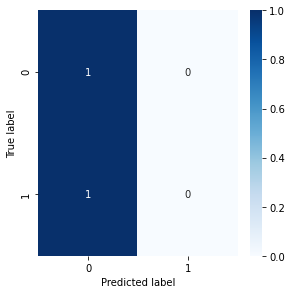

In [ ]:
import seaborn as sns

figure = plt.figure(figsize=(4, 4))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
test_low = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/ClassifierData/testing/low_testing'
test_high = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/ClassifierData/testing/high_testing'

print('Low Val Num: ' + str(len(os.listdir(os.path.join(test_low)))))
print('High Val Num: ' + str(len(os.listdir(os.path.join(test_high)))))

Low Val Num: 318
High Val Num: 223


In [ ]:
test_dir = '/content/drive/Shareddrives/Senior_Design_Team_2020-2021/Senior_Design_2020-2021/Training_Data/Final Training Data/Cells/ClassifierData/testing'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=None,
        class_mode='binary')


In [ ]:
tst_acc = test.history['acc']
test_acc = test.history['val_acc']
tst_loss = test.history['loss']
test_loss = test.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt
mask_vc = [3,5,3,13,13,16,15,9,10,8]
vc = [7,6,8,13,15,16,13,11,10,11]
img_count = [1,2,3,4,5,6,7,8,9,10]

plt.figure(figsize=(8,8))
plt.plot(img_count,vc,'o', color= 'red', markersize = 10, label = 'Manual Cell Count')
plt.plot(img_count, mask_vc,'o', color = 'blue', markersize = 10, label = 'Cellpose Cell Count', mfc = 'none')
plt.title('VC')
plt.xlabel('Image Count')
plt.ylabel('Cell Count')
#plt.legend()

In [ ]:
mask_latb = [10,15,15,20,16,15,27,31,27,32]
latb = [8,16,16,19,14,11,22,25,24,29]

plt.figure(figsize=(8,8))
plt.plot(img_count,latb,'o', color= 'red', markersize = 10, label = 'Manual Cell Count')
plt.plot(img_count, mask_latb,'o', color = 'blue', markersize = 10, label = 'Cellpose Cell Count', mfc = 'none')
plt.title('LabtB')
plt.xlabel('Image Count')
plt.ylabel('Cell Count')
#plt.legend()

In [ ]:
mask_jasp = [15,9,5,9,3,8,5,16,24,30]
jasp = [18,12,6,7,3,7,8,16,26,54]

plt.figure(figsize=(8,8))
plt.plot(img_count,jasp,'o', color= 'red', markersize = 10, label = 'Manual Cell Count')
plt.plot(img_count, mask_jasp,'o', color = 'blue', markersize = 10, label = 'Cellpose Cell Count', mfc = 'none')
plt.title('Jasp')
plt.xlabel('Image Count')
plt.ylabel('Cell Count')
#plt.legend()

In [ ]:
mask_sfm = [14,11,15,33,14,28,10,18,1,14]
sfm = [13,9,13,16,12,13,16,10,5,13]

plt.figure(figsize=(8,8))
plt.plot(img_count,sfm,'o', color= 'red', markersize = 10, label = 'Manual Cell Count')
plt.plot(img_count, mask_sfm,'o', color = 'blue', markersize = 10, label = 'Cellpose Cell Count', mfc = 'none')
plt.title('SFM')
plt.xlabel('Image Count')
plt.ylabel('Cell Count')
#plt.legend()